# Import the Required Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Required for progressbar widget
import progressbar

In [2]:
print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)

TensorFlow v2.18.0
Numpy v2.0.2


# Load the Dataset

In [3]:
train_terms = pd.read_csv("./input/cafa-5-protein-function-prediction/Train/train_terms.tsv",sep="\t")
print(train_terms.shape)

(5363863, 3)


In [4]:
unique_entry_ids = pd.Series(train_terms["EntryID"].unique())
sampled_entry_ids = unique_entry_ids.sample(n=30000, random_state=42)

In [5]:
train_terms = train_terms[train_terms.EntryID.isin(sampled_entry_ids)]
train_terms

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
...,...,...,...
5363852,X5L1L5,GO:0050649,MFO
5363853,X5L1L5,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


In [6]:
len(train_terms.EntryID.unique())

30000

# Loading the protein embeddings

In [7]:
train_protein_ids = np.load('./input/t5embeds/train_ids.npy')
print(train_protein_ids.shape)

(142246,)


In [8]:
train_protein_ids = pd.Series(train_protein_ids)
train_protein_ids = train_protein_ids[train_protein_ids.isin(sampled_entry_ids)]

In [9]:
train_protein_ids.index

Index([     2,      7,     23,     27,     31,     36,     42,     48,     57,
           62,
       ...
       142196, 142199, 142200, 142209, 142215, 142216, 142217, 142220, 142226,
       142245],
      dtype='int64', length=30000)

In [10]:
train_embeddings = np.load('./input/t5embeds/train_embeds.npy')

# Now lets convert embeddings numpy array(train_embeddings) into pandas dataframe.
column_num = train_embeddings.shape[1]
train_df = pd.DataFrame(train_embeddings, columns = ["Column_" + str(i) for i in range(1, column_num+1)])
print(train_df.shape)

(142246, 1024)


In [11]:
train_df = train_df.loc[train_protein_ids.index]
train_df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_1015,Column_1016,Column_1017,Column_1018,Column_1019,Column_1020,Column_1021,Column_1022,Column_1023,Column_1024
2,-0.020128,-0.049779,0.007894,-0.000829,-0.047737,0.086453,-0.038107,-0.036379,0.029611,0.045029,...,0.029388,0.008456,0.000697,0.013502,-0.005968,-0.011571,0.005704,-0.036103,0.007693,0.106234
7,0.007108,0.015627,0.074379,-0.001099,-0.003584,0.022627,-0.001857,-0.042442,0.075130,-0.014907,...,-0.017345,-0.063895,0.021089,0.004839,0.041191,0.010720,0.016241,0.025502,0.051283,-0.016549
23,0.007159,-0.021914,-0.006876,0.024132,-0.002332,0.076055,-0.079528,-0.044097,0.039925,-0.052741,...,-0.022830,0.009206,0.036331,-0.074084,0.052513,-0.016132,0.032741,-0.002499,0.054621,0.023362
27,-0.005525,0.012020,0.041889,-0.002907,-0.028546,0.021716,-0.008641,-0.067096,0.054098,0.021957,...,-0.026123,0.020873,-0.007648,-0.031139,0.057433,-0.001657,-0.010208,-0.004205,-0.005226,0.014905
31,-0.024888,0.001236,0.043671,-0.064294,0.061739,0.041889,-0.026591,-0.109730,0.023297,0.018219,...,0.015735,-0.002064,0.033222,-0.062870,0.041804,-0.027230,0.006839,-0.023512,0.051200,0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142216,-0.001777,-0.085363,0.007407,0.025494,0.000616,0.022399,-0.064389,-0.045314,-0.004303,0.007644,...,-0.039913,-0.048208,0.001018,-0.010144,0.056718,0.047404,-0.000170,-0.016493,0.030739,-0.004321
142217,0.006750,0.018595,-0.003094,-0.021610,0.039002,0.044726,-0.067659,-0.112213,0.043882,0.039287,...,0.004462,-0.016040,-0.014282,-0.057910,0.045051,-0.027988,-0.029104,-0.009226,0.085498,0.054317
142220,0.038637,0.026872,-0.006892,0.032962,0.013990,0.066377,-0.049481,-0.098170,0.062239,-0.011238,...,0.022836,-0.008828,-0.018834,-0.077278,0.068043,0.006519,-0.024983,0.018604,0.101102,0.020500
142226,0.046083,0.022152,0.030201,0.014525,-0.000767,0.094797,-0.022135,-0.044653,0.017802,0.004684,...,-0.042518,0.003617,-0.001008,0.013616,0.073639,0.012859,0.051146,-0.006737,0.025557,0.003078


# Prepare the dataset

In [57]:
# Select first 1500 values for plotting
plot_df = train_terms['term'].value_counts().iloc[:100]

figure, axis = plt.subplots(1, 1, figsize=(12, 6))

bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
pie_chart_file = './output/aspect_pie_chart.png'
plt.savefig(pie_chart_file)
plt.close()  


C:\Users\gautam\AppData\Local\Temp\ipykernel_18868\4211160443.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)


In [13]:
# Set the limit for label
num_of_labels = 1000

# Take value counts in descending order and fetch first 1500 `GO term ID` as labels
labels = train_terms['term'].value_counts().index[:num_of_labels].tolist()

In [14]:
# Fetch the train_terms data for the relevant labels only
train_terms_updated = train_terms.loc[train_terms['term'].isin(labels)]
train_terms_updated

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
6,A0A009IHW8,GO:0044237,BPO
...,...,...,...
5363851,X5L1L5,GO:0003674,MFO
5363853,X5L1L5,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


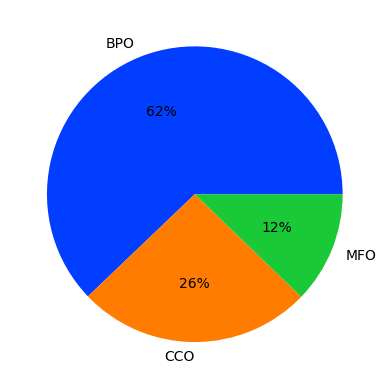

In [58]:
pie_df = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
pie_chart_file = './output/pie_chart.png'
plt.savefig(pie_chart_file)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

train_terms['aspect'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, explode=[0.1, 0.1, 0.1], shadow=True)
pie_chart_file = './output/aspect_pie_chart.png'
plt.savefig(pie_chart_file)
plt.close()  

In [16]:
# Setup progressbar settings.
# This is strictly for aesthetic.
bar = progressbar.ProgressBar(maxval=num_of_labels, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

# Create an empty dataframe of required size for storing the labels,
# i.e, train_size x num_of_labels (142246 x 1500)
train_size = train_protein_ids.shape[0] # len(X)
train_labels = np.zeros((train_size ,num_of_labels))

# Convert from numpy to pandas series for better handling
series_train_protein_ids = pd.Series(train_protein_ids)

# Loop through each label
for i in range(num_of_labels):
    # For each label, fetch the corresponding train_terms data
    n_train_terms = train_terms_updated[train_terms_updated['term'] ==  labels[i]]

    # Fetch all the unique EntryId aka proteins related to the current label(GO term ID)
    label_related_proteins = n_train_terms['EntryID'].unique()

    # In the series_train_protein_ids pandas series, if a protein is related
    # to the current label, then mark it as 1, else 0.
    # Replace the ith column of train_Y with with that pandas series.
    train_labels[:,i] =  series_train_protein_ids.isin(label_related_proteins).astype(float)

    # Progress bar percentage increase
    bar.update(i+1)

# Notify the end of progress bar
bar.finish()

# Convert train_Y numpy into pandas dataframe
labels_df = pd.DataFrame(data = train_labels, columns = labels)
print(labels_df.shape)

[                                                                        ]   0%
[                                                                        ]   1%
[=                                                                       ]   2%
[==                                                                      ]   3%
[===                                                                     ]   5%
[====                                                                    ]   6%
[=====                                                                   ]   7%
[======                                                                  ]   8%
[=======                                                                 ]  10%
[========                                                                ]  11%
[=========                                                               ]  12%
[==========                                                              ]  14%
[==========                             

(30000, 1000)


In [17]:
labels_df

,GO:0005575,GO:0008150,GO:0110165,GO:0003674,GO:0005622,GO:0009987,GO:0043226,GO:0043229,GO:0005488,GO:0043227,...,GO:0008194,GO:0055001,GO:0032259,GO:0010506,GO:0048545,GO:0009570,GO:0045936,GO:0043254,GO:0010563,GO:0016835
0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the test size and random state for reproducibility
test_size = 0.2  # Use 20% of the data for the test set
random_state = 42  # Random seed for reproducibility

# Split the feature and label datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_df, labels_df, test_size=test_size, random_state=random_state
)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 1024)
(6000, 1024)
(24000, 1000)
(6000, 1000)


# Training

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

INPUT_SHAPE = [X_train.shape[1]]
BATCH_SIZE = 5120

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=num_of_labels,activation='sigmoid')
])


# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()],
)

history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=5
)


c:\Satya\myenv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - auc: 0.5198 - binary_accuracy: 0.6519 - loss: 0.6326
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - auc: 0.6094 - binary_accuracy: 0.9652 - loss: 0.1883
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - auc: 0.6994 - binary_accuracy: 0.9702 - loss: 0.1774
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - auc: 0.7990 - binary_accuracy: 0.9694 - loss: 0.1262
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - auc: 0.8248 - binary_accuracy: 0.9717 - loss: 0.1173


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

INPUT_SHAPE = [X_train.shape[1]]
BATCH_SIZE = 5120

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=num_of_labels,activation='sigmoid')
])


# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()],
)

history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=10
)


Epoch 1/10


c:\Satya\myenv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - auc_1: 0.5524 - binary_accuracy: 0.6579 - loss: 0.6297
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - auc_1: 0.6300 - binary_accuracy: 0.9663 - loss: 0.1801
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - auc_1: 0.7073 - binary_accuracy: 0.9699 - loss: 0.1774
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - auc_1: 0.7996 - binary_accuracy: 0.9694 - loss: 0.1275
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - auc_1: 0.8238 - binary_accuracy: 0.9720 - loss: 0.1173
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - auc_1: 0.8118 - binary_accuracy: 0.9721 - loss: 0.1071
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - auc_1: 0.8147 - binary_accuracy: 0.9718 - loss: 0.1070
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - auc_1: 0.8275 - binary_accuracy: 0.9719 - loss: 0.1036
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - auc_1: 0.8335 - binary_accuracy: 0.9722 - loss: 0.1013
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step -

In [22]:
# RNN-based architecture with LSTM
model_rnn = tf.keras.Sequential([
    layers.Reshape((INPUT_SHAPE[0], 1), input_shape=INPUT_SHAPE),  # Reshape for RNN
    layers.LSTM(64),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_of_labels, activation='sigmoid')
])

# Compile the model
model_rnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()]
)

# Train the model
history_rnn = model_rnn.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=10
)


c:\Satya\myenv\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - auc_2: 0.5004 - binary_accuracy: 0.7438 - loss: 0.6925
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - auc_2: 0.5526 - binary_accuracy: 0.9492 - loss: 0.6884
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - auc_2: 0.5893 - binary_accuracy: 0.9606 - loss: 0.6755
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - auc_2: 0.5899 - binary_accuracy: 0.9706 - loss: 0.5806
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - auc_2: 0.6160 - binary_accuracy: 0.9717 - loss: 0.3080
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - auc_2: 0.6574 - binary_accuracy: 0.9718 - loss: 0.1435
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - auc_2: 0.7241 - binary_accuracy: 0.9718 - loss: 0.1143
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - auc_2: 0.7645 - binary_accuracy: 0.9718 - loss: 0.1197
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - auc_2: 0.7767 - binary_accuracy: 0.9719 - loss: 0.1181
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - auc_

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    precision_recall_curve, auc, roc_curve, hamming_loss
)

# Predictions for each model on the test set
predictions = model.predict(X_test)  # Dense model
# predictions_cnn = model_cnn.predict(X_test)  # CNN model
predictions_rnn = model_rnn.predict(X_test)  # RNN model

# Threshold for converting probabilities to binary
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)
# binary_predictions_cnn = (predictions_cnn >= threshold).astype(int)
binary_predictions_rnn = (predictions_rnn >= threshold).astype(int)

# True labels from the test set
true_labels = y_test.to_numpy()

# Hamming Score for each model (1 - Hamming Loss)
hamming_score = 1 - hamming_loss(true_labels, binary_predictions)
# hamming_score_cnn = 1 - hamming_loss(true_labels, binary_predictions_cnn)
hamming_score_rnn = 1 - hamming_loss(true_labels, binary_predictions_rnn)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step


In [24]:
# CNN-based architecture
model_cnn = tf.keras.Sequential([
    layers.Reshape((INPUT_SHAPE[0], 1), input_shape=INPUT_SHAPE),  # Reshape for convolution
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),  # Flatten before Dense layers
    layers.Dense(256, activation='relu'),
    layers.Dense(num_of_labels, activation='sigmoid')
])

# Compile the model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()]
)

# Train the model
history_cnn = model_cnn.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=10
)


c:\Satya\myenv\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - auc_3: 0.5571 - binary_accuracy: 0.6247 - loss: 0.6840
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 363ms/step - auc_3: 0.5899 - binary_accuracy: 0.8882 - loss: 0.4914
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - auc_3: 0.6314 - binary_accuracy: 0.9649 - loss: 0.1618
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - auc_3: 0.6863 - binary_accuracy: 0.9706 - loss: 0.1714
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - auc_3: 0.7471 - binary_accuracy: 0.9706 - loss: 0.1495
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - auc_3: 0.7962 - binary_accuracy: 0.9717 - loss: 0.1209
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - auc_3: 0.8082 - binary_accuracy: 0.9717 - loss: 0.1144
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 324ms/step - auc_3: 0.8057 - binary_accuracy: 0.9717 - loss: 0.1094
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - auc_3: 0.8023 - binary_accuracy: 0.9718 - loss: 0.1071
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step


c:\Satya\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Satya\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Satya\myenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


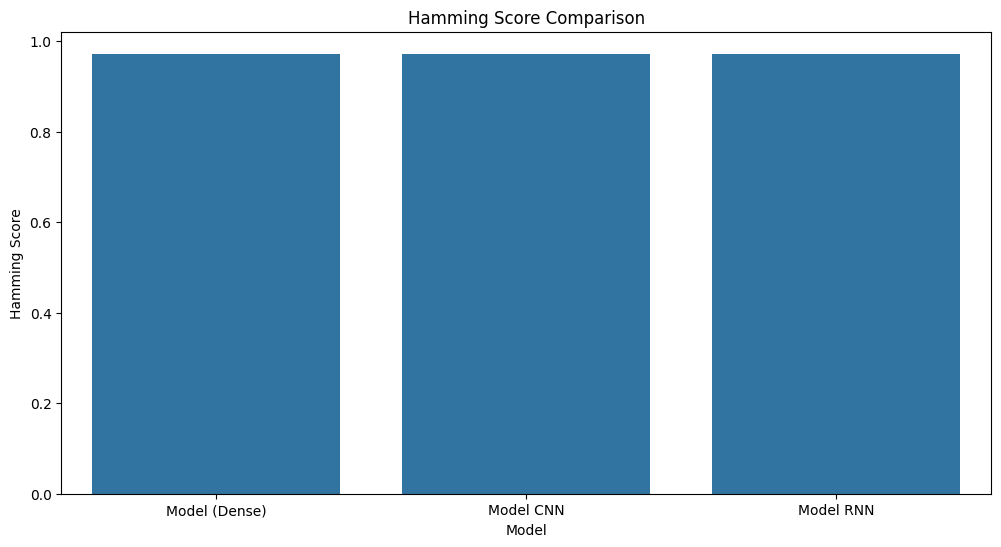

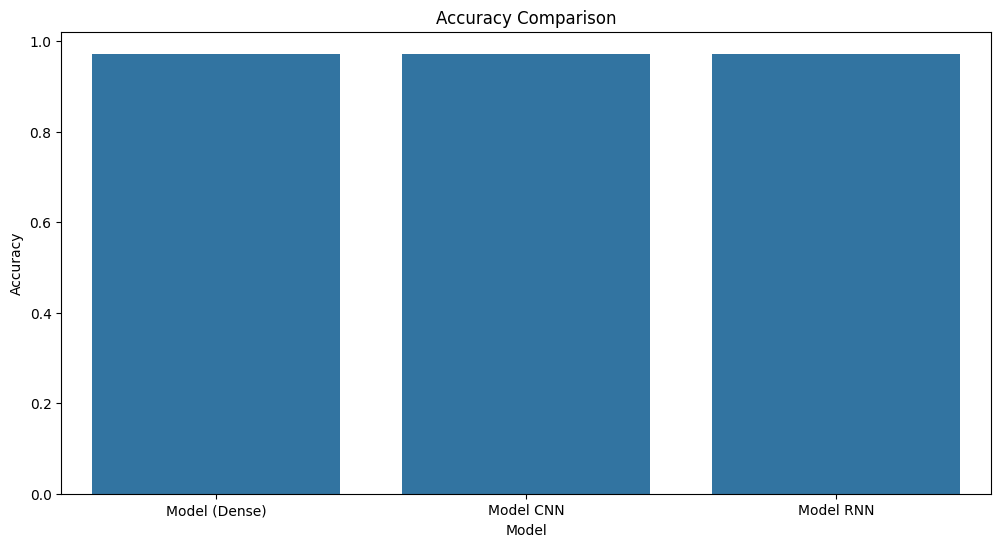

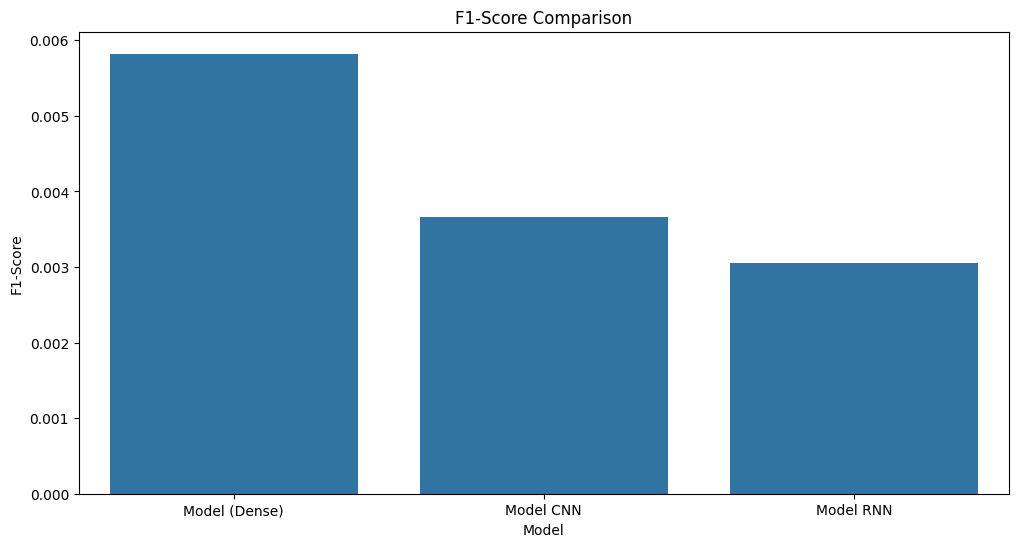

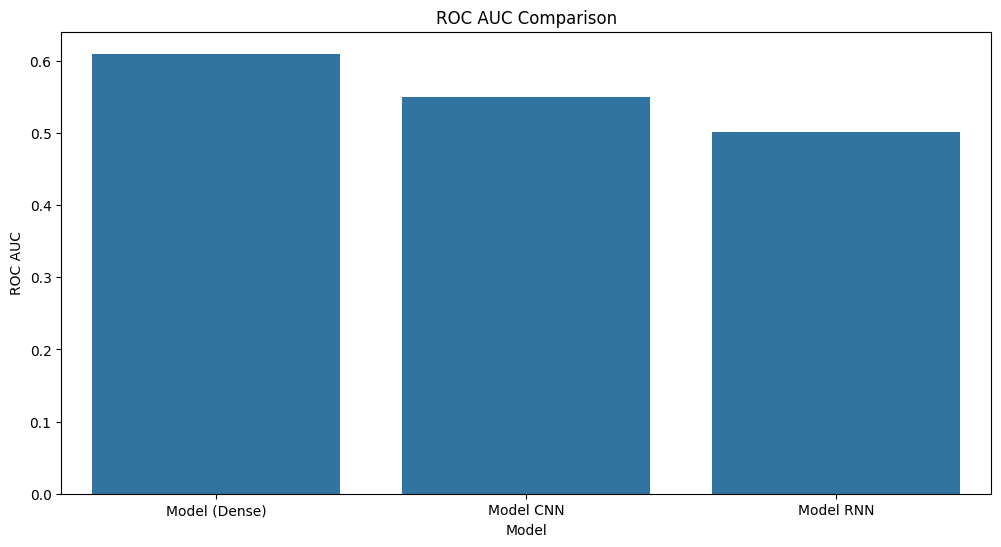

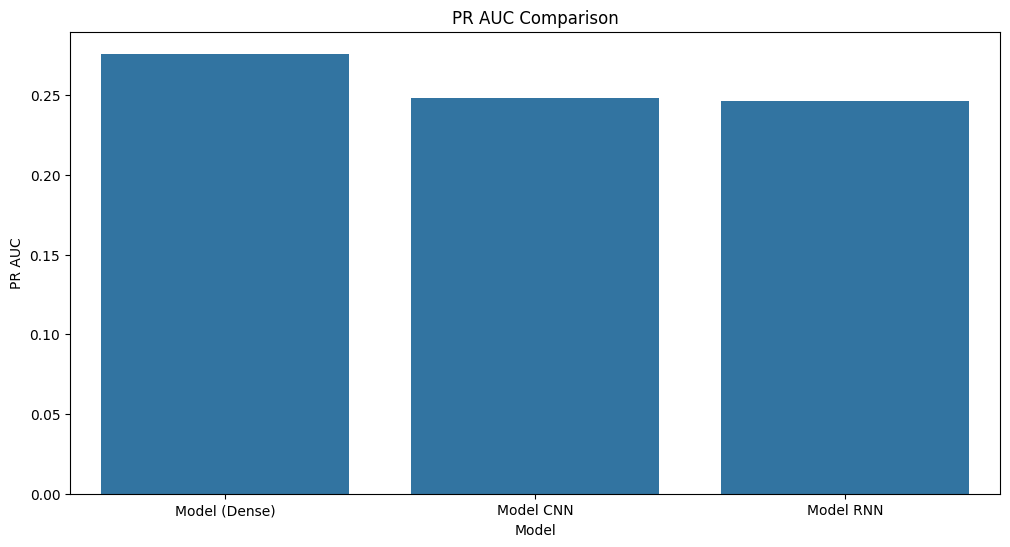

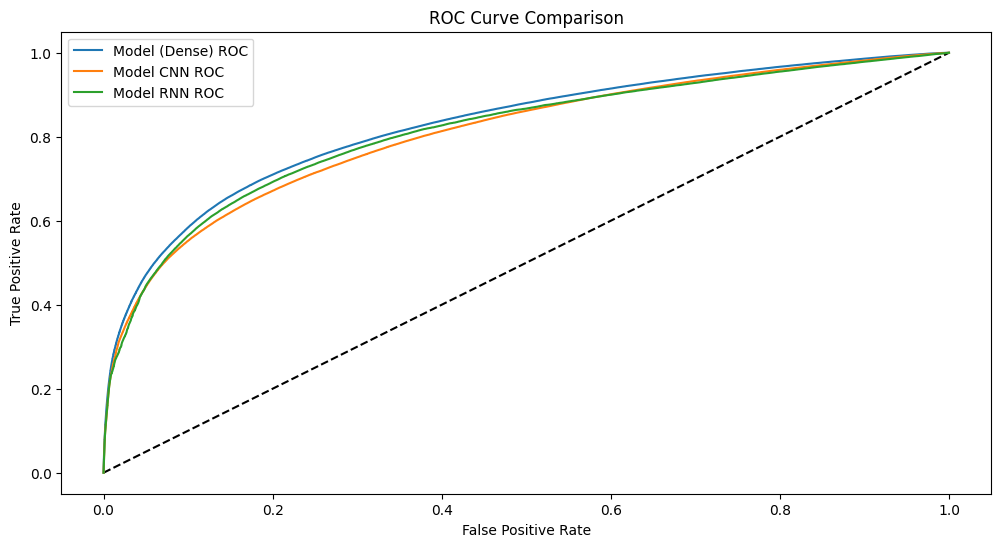

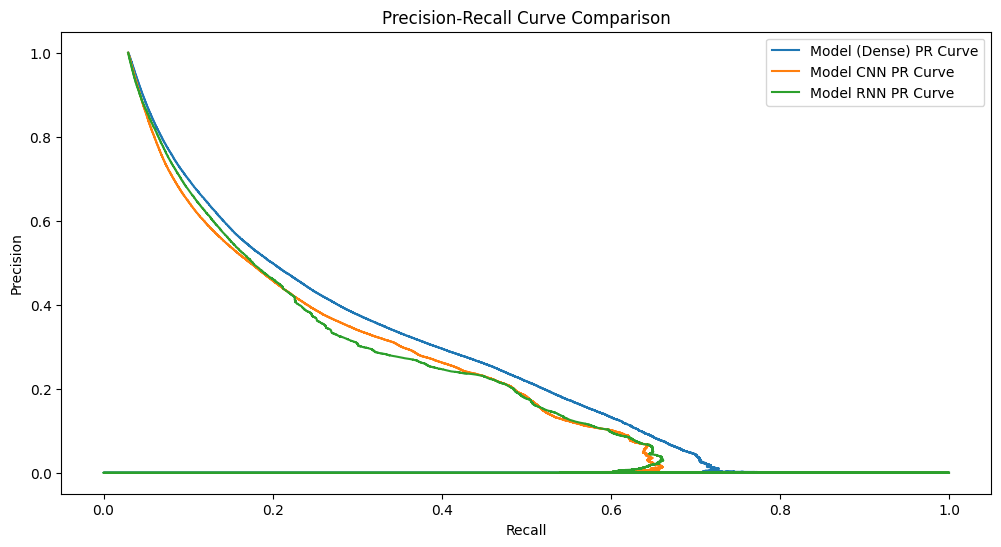

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    precision_recall_curve, auc, roc_curve, hamming_loss
)

# Predictions for each model on the test set
predictions = model.predict(X_test)  # Dense model
predictions_cnn = model_cnn.predict(X_test)  # CNN model
predictions_rnn = model_rnn.predict(X_test)  # RNN model

# Threshold for converting probabilities to binary
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)
binary_predictions_cnn = (predictions_cnn >= threshold).astype(int)
binary_predictions_rnn = (predictions_rnn >= threshold).astype(int)

# True labels from the test set
true_labels = y_test.to_numpy()

# Calculate Hamming Score for each model
hamming_score = 1 - hamming_loss(true_labels, binary_predictions)
hamming_score_cnn = 1 - hamming_loss(true_labels, binary_predictions_cnn)
hamming_score_rnn = 1 - hamming_loss(true_labels, binary_predictions_rnn)

# List to store metrics for the three models
metrics_list = []

# Iterate over the models and compute metrics
for model_name, pred, bin_pred, hamming in zip(
    ['Model (Dense)', 'Model CNN', 'Model RNN'],
    [predictions, predictions_cnn, predictions_rnn],
    [binary_predictions, binary_predictions_cnn, binary_predictions_rnn],
    [hamming_score, hamming_score_cnn, hamming_score_rnn]
):
    accuracy = accuracy_score(true_labels.flatten(), bin_pred.flatten())
    precision, recall, f1_score, _ = precision_recall_fscore_support(
        true_labels, bin_pred, average='macro'
    )
    roc_auc = roc_auc_score(true_labels, pred, average='macro')

    precision_curve, recall_curve, _ = precision_recall_curve(true_labels.ravel(), pred.ravel())
    pr_auc = auc(recall_curve, precision_curve)

    # Append metrics to the list
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Hamming Score': hamming
    })

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve

# Save Hamming Score Comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Hamming Score', data=metrics_df)
plt.title('Hamming Score Comparison')
plt.savefig('output/hamming_score_comparison.png')  # Save the plot as a PNG file
plt.show()

# Save Accuracy Comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df)
plt.title('Accuracy Comparison')
plt.savefig('output/accuracy_comparison.png')  # Save the plot as a PNG file
plt.show()

# Save F1-Score Comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-Score', data=metrics_df)
plt.title('F1-Score Comparison')
plt.savefig('output/f1_score_comparison.png')  # Save the plot as a PNG file
plt.show()

# Save ROC AUC Comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='ROC AUC', data=metrics_df)
plt.title('ROC AUC Comparison')
plt.savefig('output/roc_auc_comparison.png')  # Save the plot as a PNG file
plt.show()

# Save PR AUC Comparison plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='PR AUC', data=metrics_df)
plt.title('PR AUC Comparison')
plt.savefig('output/pr_auc_comparison.png')  # Save the plot as a PNG file
plt.show()

# Save ROC Curve Comparison for all three models
fpr, tpr, _ = roc_curve(true_labels.ravel(), predictions.ravel())
fpr_cnn, tpr_cnn, _ = roc_curve(true_labels.ravel(), predictions_cnn.ravel())
fpr_rnn, tpr_rnn, _ = roc_curve(true_labels.ravel(), predictions_rnn.ravel())

plt.figure(figsize=(12, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.plot(fpr, tpr, label='Model (Dense) ROC')
plt.plot(fpr_cnn, tpr_cnn, label='Model CNN ROC')
plt.plot(fpr_rnn, tpr_rnn, label='Model RNN ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig('output/roc_curve_comparison.png')  # Save the ROC curve comparison plot
plt.show()

# Save Precision-Recall Curve Comparison for all three models
precision_curve, recall_curve, _ = precision_recall_curve(
    true_labels.ravel(), predictions.ravel()
)
precision_curve_cnn, recall_curve_cnn, _ = precision_recall_curve(
    true_labels.ravel(), predictions_cnn.ravel()
)
precision_curve_rnn, recall_curve_rnn, _ = precision_recall_curve(
    true_labels.ravel(), predictions_rnn.ravel()
)

plt.figure(figsize=(12, 6))
plt.plot(precision_curve, recall_curve, label='Model (Dense) PR Curve')
plt.plot(precision_curve_cnn, recall_curve_cnn, label='Model CNN PR Curve')
plt.plot(precision_curve_rnn, recall_curve_rnn, label='Model RNN PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.savefig('output/pr_curve_comparison.png')  # Save the PR curve comparison plot
plt.show()


In [55]:
binary_predictions = binary_predictions.astype(float)
true_labels = true_labels.flatten()
binary_predictions = binary_predictions.flatten()

print(true_labels)
print(binary_predictions)
print(type(true_labels),)
print(len(true_labels))
print(len(binary_predictions))
accuracy = accuracy_score(true_labels, binary_predictions)
print(accuracy)

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>
6000000
6000000
0.9721943333333334


# Plot the model's loss and accuracy for each epoch

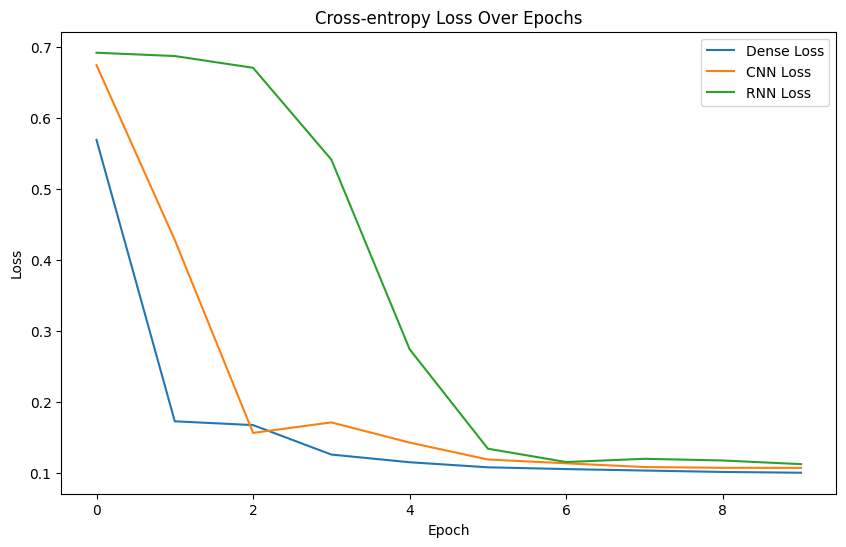

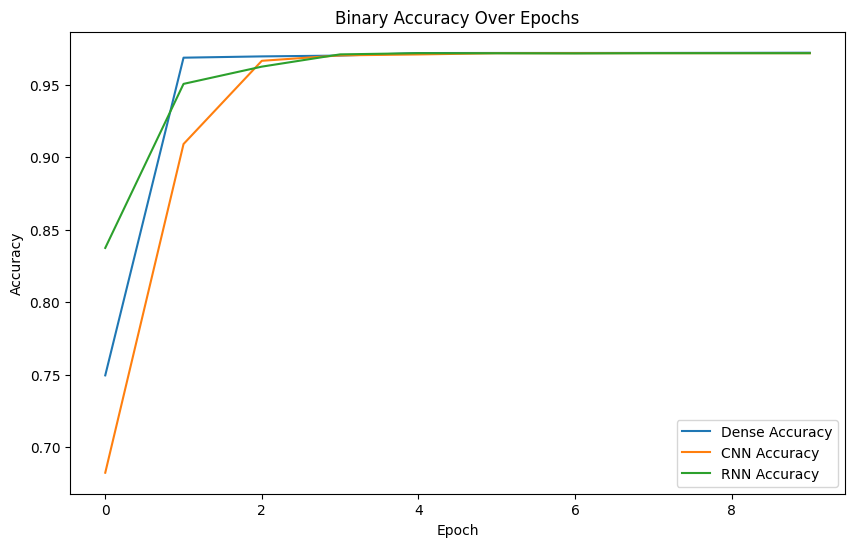

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrames to store the training history of different models
history_dense_df = pd.DataFrame(history.history)  # Original Dense model
history_cnn_df = pd.DataFrame(history_cnn.history)  # CNN model
history_rnn_df = pd.DataFrame(history_rnn.history)  # RNN model with LSTM

# Plot cross-entropy loss for all models
plt.figure(figsize=(10, 6))
plt.plot(history_dense_df['loss'], label='Dense Loss')
plt.plot(history_cnn_df['loss'], label='CNN Loss')
plt.plot(history_rnn_df['loss'], label='RNN Loss')
plt.title('Cross-entropy Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('output/cross_entropy_loss.png')
plt.show()

# Plot binary accuracy for all models
plt.figure(figsize=(10, 6))
plt.plot(history_dense_df['binary_accuracy'], label='Dense Accuracy')
plt.plot(history_cnn_df['binary_accuracy'], label='CNN Accuracy')
plt.plot(history_rnn_df['binary_accuracy'], label='RNN Accuracy')
plt.title('Binary Accuracy Over Epochs')
plt.savefig('output/binary_accuracy.png')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()